<a href="https://colab.research.google.com/github/thaisrezendeb/ufes_machineLearning/blob/main/Exercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte I – Pré-Processamento de Dados

**1. A base de dados Nebulosa (disponibilizada em anexo) está contaminada com ruídos, redundâncias, dados incompletos (substituídos pelo valor -100), inconsistências e outliers. Para esta base:**

**a) Obtenha os resultados da classificação (métrica acurácia) usando a  técnica do vizinho mais próximo (NN) e Rocchio. Utilize a distância Euclidiana e a base de dados crua, sem pré-processamento. Use o conjunto de 143 amostras para treino e o de 28 amostras para teste. Remova as amostras com dados incompletos.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from matplotlib import cm
import seaborn as sns

header_nebulosa = np.array(["Id", "Nome", "PorteFisico", "NivelEducacional", 
                   "NivelSocioeconomico", "EpocaNascimento", "Idade", "Classificacao"])

**Função para cálculo da acurácia baseada na técnica do vizinho mais próximo:**

O algoritmo de classificação baseado no vizinho mais próximo prevê o uso das amostras de treinamento para todas as vezes que um novo conjunto de amostras tiver que ser classificada. Sendo assim, a função para cálculo da acurácia pelo método do vizinho mais próximo deverá receber tantos as amostras de teste quanto as amostras para treinamento.

In [ ]:
def vizinho(base_train, base_test):
  acuracia = 0
  
  #Cálculo da distância Euclidiana
  #Verifica a distância de cada amostra da base de teste com cada uma das amostras da base de treinamento
  for i, row in base_test.iterrows():
    dist_min = 1000000
    classif_new = row[base_test.shape[1]-1]

    for j, row_next in base_train.iterrows():
      dist = 0
      for k in range(0, base_test.shape[1]-1):
        #print(k)
        dist = dist + np.power(row_next[k]-row[k],2)

      dist = np.sqrt(dist)
      if dist < dist_min:
        dist_min = dist
        classif_new = row_next[base_test.shape[1]-1]
    
    if row[base_test.shape[1]-1] == classif_new:
      acuracia = acuracia + 1

  #  print("Classif original de", i, ":", row[6], "nova classif", classif_new)
  acuracia = np.divide(acuracia, base_test.shape[0])

  return acuracia

**Função para cálculo da acurácia baseada na técnica de classificação Rocchio:**

Para a técnica Rocchio, serão encontrados os centróides das classes identificadas nas amostras de treino [1, 2, 3]. A função recebe como parâmetros as amostras para treino e as amostras para teste.

In [ ]:
def rocchio(rocchio_train, rocchio_test):
  acuracia = 0

  #Filtro das amostras classificadas como classe 1
  nebulosa_1 = rocchio_train[rocchio_train['Classificacao'] == 1]
  #Centróide da classe 1
  mi_1 = nebulosa_1.mean()
  
  #Filtro das amostras classificadas como classe 2
  nebulosa_2 = rocchio_train[rocchio_train['Classificacao'] == 2]
  #Centróide da classe 2
  mi_2 = nebulosa_2.mean()
  
  #Filtro das amostras classificadas como classe 3
  nebulosa_3 = rocchio_train[rocchio_train['Classificacao'] == 3]
  #Centróide da classe 3
  mi_3 = nebulosa_3.mean()

  #Com os centróides calculados, verifica-se a acurácia deste método
  for i, row in rocchio_test.iterrows():
    dist_min = 1000000
    classif_new = row[rocchio_test.shape[1]-1]

    #Distância para o primeiro centróide
    dist = 0
    for k in range(0, rocchio_test.shape[1]-1):
      dist = dist + np.power(row[k]-mi_1[k],2)
    
    dist = np.sqrt(dist)    
    if dist < dist_min:
      dist_min = dist
      classif_new = 1

    #Distância para o segundo centróide
    dist = 0
    for k in range(0, rocchio_test.shape[1]-1):
      dist = dist + np.power(row[k]-mi_2[k],2)
    
    dist = np.sqrt(dist)
    if dist < dist_min:
      dist_min = dist
      classif_new = 2

    #Distância para o terceiro centróide
    dist = 0
    for k in range(0, rocchio_test.shape[1]-1):
      dist = dist + np.power(row[k]-mi_3[k],2)
    
    dist = np.sqrt(dist)
    if dist < dist_min:
      dist_min = dist
      classif_new = 3

    if row[rocchio_test.shape[1]-1] == classif_new:
      acuracia = acuracia + 1

  acuracia = np.divide(acuracia, rocchio_test.shape[0])
  return acuracia

**Função para tratamento das amostras com dados incompletos (remoção):**

In [ ]:
def remove_incompletas(base_incompleta):
  #Eliminação das amostras com dados incompletos
  nan_value = float("NaN")
  base_incompleta.replace(-100, nan_value, inplace=True)
  base_incompleta.dropna(inplace=True)
  return base_incompleta
  #nebulosa_train.to_csv("nebulosa_train.csv", sep=",", header=True)

**Resultado da classificação pelo método acurácia usando a técnica do vizinho mais próximo:**

In [ ]:
#Leitura da base de treinamento
nebulosa_train = pd.read_csv('nebulosa_train.txt', sep=' ', names=header_nebulosa, index_col="Id")
#Leitura da base de teste
nebulosa_test = pd.read_csv('nebulosa_test.txt', sep=' ', names=header_nebulosa, index_col="Id")

#Remove amostras incompletas de ambas as bases
nebulosa_train = remove_incompletas(nebulosa_train)
nebulosa_test = remove_incompletas(nebulosa_test)
#print(nebulosa_train.shape)
#Cálculo da acurácia através da função 'vizinho'
acuracia_vizinho = vizinho(nebulosa_train, nebulosa_test)
print("Acurácia NN: {:.2f}%".format(acuracia_vizinho*100))

Acurácia NN: 56.00%


Pela técnica do vizinho mais próximo usando a distância Euclidiana, a acurácia obtida foi de **56%**.


**Resultado da classificação pelo método acurácia usando a técnica Rocchio**

Para a classificação por Rocchio, uma vez que o modelo já passou pelo processo de treinamento, as amostras de treinamento podem ser descartadas, portanto informa-se apenas a base de teste.

In [ ]:
#Envio das amostras para aferir acurácia do modelo
acuracia_rocchio = rocchio(nebulosa_train, nebulosa_test)
print("Acurácia Rocchio: {:.2f}%".format(acuracia_rocchio*100))

Acurácia Rocchio: 56.00%


A técnica de classificação por Rocchio apresentou uma acurácia de **56%**, mesmo resultado obtido pelo método do vizinho mais próximo.

**b) Realize um pré-processamento sobre os dados de forma a reduzir os ruídos, as
redundâncias, inconsistências, outliers e a interferência dos dados incompletos.
Obtenha os resultados da classificação usando a técnica do vizinho mais próximo (NN)
e Rocchio usando a distância Euclidiana e a mesma divisão dos dados.**

Por inspeção visual, percebe-se que as colunas EpocaNascimento e Idade possuem os mesmos valores, portanto são informações redundantes. Uma das colunas será eliminada do conjunto de dados. Também por inspeção visual, conclui-se que o nome é uma informação irrelevante.

In [ ]:
#Redução da dimensionalidade (eliminação de atributos desnecessários)
#Remoção das colunas Nome e EpocaNascimento (tem o mesmo valor da coluna Idade)
nebulosa_train_pre = nebulosa_train.drop(["Nome","EpocaNascimento"], axis=1)
nebulosa_test_pre = nebulosa_test.drop(["Nome","EpocaNascimento"], axis=1)

#Remoção das amostras duplicadas
header_pre = np.array(["PorteFisico", "NivelEducacional", "NivelSocioeconomico", "Idade"])
nebulosa_train_pre = nebulosa_train_pre.drop_duplicates(subset=header_pre)
#nebulosa_train_pre.shape

Pelo gráfico boxplot, percebe-se a presença de outliers em três dos quatro atributos restantes nas amostras de treino (excluindo-se da análise o atributo de classificação). Nas amostras de teste não foram percebidos *outliers*.

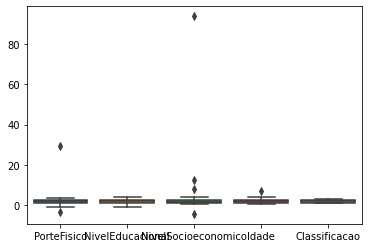

In [ ]:
sns.boxplot(data=nebulosa_train_pre)

Os valores mínimos e máximos apresentados no gráfico são dados pelas expressões:

* Limite Inferior = Primeiro Quartil – 1,5 * (Terceiro Quartil – Primeiro Quartil)

* Limite Superior = Terceiro Quartil + 1,5 * (Terceiro Quartil – Primeiro Quartil)

Para a correção dos *outliers*, optou-se pela substituição dos valores pela mediana do atributo. 

In [ ]:
def remove_outliers(base_outlier, remove=0):
  lim_inf = base_outlier.quantile(0.25) - \
              1.5 * (base_outlier.quantile(0.75) - base_outlier.quantile(0.25))
  lim_sup = base_outlier.quantile(0.75) + \
              1.5 * (base_outlier.quantile(0.75) - base_outlier.quantile(0.25))
  #lim_inf = base_outlier.quantile(0.01)
  #lim_sup = base_outlier.quantile(0.99)
  #print("Lim_inf =\n", lim_inf, "\n\nLim_sup =\n", lim_sup)
  medianas = base_outlier.median()
  
  for i, row in base_outlier.iterrows():
    for j in range(0, base_outlier.shape[1]-1):
      if ((row[j] < lim_inf[j]) or (row[j] > lim_sup[j])):
        #print("Atual =", row[j], "linha = ", i)
        row[j] = medianas[j]
        
  return base_outlier

In [ ]:
#nebulosa_train_pre = remove_outliers(nebulosa_train_pre)
lim_inf = nebulosa_train_pre.quantile(0.25) - \
            1.5 * (nebulosa_train_pre.quantile(0.75) - nebulosa_train_pre.quantile(0.25))
lim_sup = nebulosa_train_pre.quantile(0.75) + \
            1.5 * (nebulosa_train_pre.quantile(0.75) - nebulosa_train_pre.quantile(0.25))

for i in range(0,nebulosa_train_pre.shape[1]-1):
  nebulosa_train_pre = nebulosa_train_pre[nebulosa_train_pre[header_pre[i]] > lim_inf[header_pre[i]]]
  nebulosa_train_pre = nebulosa_train_pre[nebulosa_train_pre[header_pre[i]] < lim_sup[header_pre[i]]]

#Valores removidos por análise gráfica
nebulosa_train_pre = nebulosa_train_pre[nebulosa_train_pre['PorteFisico'] >= 0]
nebulosa_train_pre = nebulosa_train_pre[nebulosa_train_pre['NivelEducacional'] >= 0]

In [ ]:
#Cálculo da acurácia através da função 'vizinho' para amostras pré-processadas
acuracia_vizinho = vizinho(nebulosa_train_pre, nebulosa_test_pre)
print("Acurácia NN após eliminar outliers: {:.2f}%".format(acuracia_vizinho*100))

Acurácia NN após eliminar outliers: 76.00%


In [ ]:
#Envio das amostras pré-processadas para aferir acurácia do modelo
acuracia_rocchio = rocchio(nebulosa_train_pre, nebulosa_test_pre)
print("Acurácia Rocchio após eliminar outliers: {:.2f}%".format(acuracia_rocchio*100))

Acurácia Rocchio após eliminar outliers: 44.00%


Após o pré-processamento das amostras, percebeu-se uma melhora na acurácia da classificação pelo método do vizinho mais próximo, para **76%**, porém o método Rocchio retornou um resultado inferior: **44%**.

**c) Compare os resultados obtidos em a) e b). Qual deles retornou o melhor resultado?
Por quê?**

Com a remoção dos *outliers* as amostras ficaram mais concentradas no mesmo espaço, portanto a separação entre elas é mais difícil de ser obtida, dificultando a classificação. Mesmo assim, o método do vizinho mais próximo teve uma melhora no resultado da sua acurácia (de **56%** para **76%**). O mesmo não ocorreu com o método Rocchio, que teve um resultado pior (de **56%** para **44%**). As distribuições são apresentadas no conjunto de gráficos a seguir. Percebe-se, ainda, a a presença de algumas amostras afastadas, que também poderiam ser classificadas como *outliers*, porém, como já observado anteriormente, a remoção dessas amostras pioraria ainda mais os resultados da acurácia do modelo. Para uma melhor classificação seria necessário a utilização de outro método que não por distância.

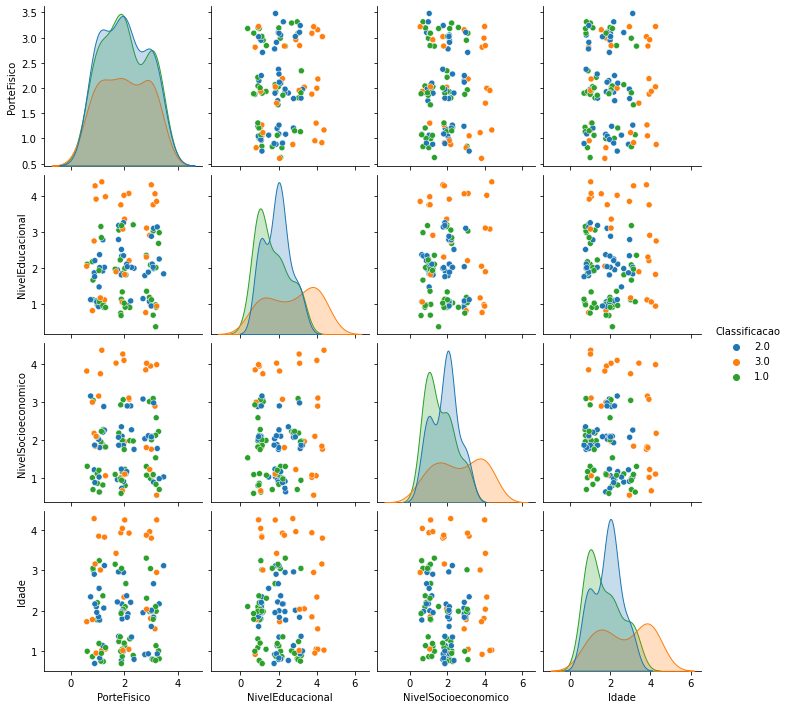

In [ ]:
nebulosa_train_pre['Classificacao'] = nebulosa_train_pre['Classificacao'].astype(str)
sns.pairplot(nebulosa_train_pre, hue="Classificacao")

In [ ]:
#corrMatrix = nebulosa_train_pre.corr()
#sns.heatmap(corrMatrix, annot=True)
#plt.show()